# IBM_QISKIT_EXAM_C1000-112 

In [2]:
import matplotlib as mpl
import qiskit
import pylatexenc
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import *

In [5]:
# Perform operations around the Qiskit version
qiskit.__qiskit_version__

{'qiskit-terra': '0.24.0', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [16]:
# Construct multi-qubit quantum registers
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

# Measure quantum circuits in classical registers
qc = QuantumCircuit(qr, cr)
qc.h(0)
qc.cx(0,1)
# Use barrier operations
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)

In [19]:
# Return the OpenQASM string for a circuit
qasm_code = qc.qasm()
qasm_code

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q8[2];\ncreg c7[2];\nh q8[0];\ncx q8[0],q8[1];\nbarrier q8[0],q8[1];\nmeasure q8[0] -> c7[0];\nmeasure q8[1] -> c7[1];\n'

In [39]:
# Read a QASM file and string
qc2 = QuantumCircuit.from_qasm_str(qasm_code)

# Draw a circuit
qc.draw("text")

┌───┐      ░ ┌─┐   
q8_0: ┤ H ├──■───░─┤M├───
      └───┘┌─┴─┐ ░ └╥┘┌─┐
q8_1: ─────┤ X ├─░──╫─┤M├
           └───┘ ░  ║ └╥┘
c7: 2/══════════════╩══╩═
                    0  1

In [40]:
# Return the circuit depth
qc.depth()

3

In [49]:
# Access a qasm_simulator backend
sim = Aer.get_backend('qasm_simulator')

# Execute a quantum circuit
job = execute(qc2, sim, shots=1000)

# Monitor the status of a job instance
print(job.status())
import time
time.sleep(1)
print(job.status())


result = job.result()
result

JobStatus.INITIALIZING
JobStatus.DONE


Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='9e5e6051-e5c4-42fd-aa56-2bef9d48d1e7', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 477, '0x0': 523}), header=QobjExperimentHeader(creg_sizes=[['c7', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-146', qreg_sizes=[['q8', 2]]), status=DONE, seed_simulator=3791582813, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 4, 'sample_measure_time': 0.001076499, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.003072661)], date=2023-07-25T13:21:22.250136, status=COMPLETED, header=None, metadata={'time_taken_execute': 0.003104387, 'mpi_rank': 0, 'num_mpi_proc

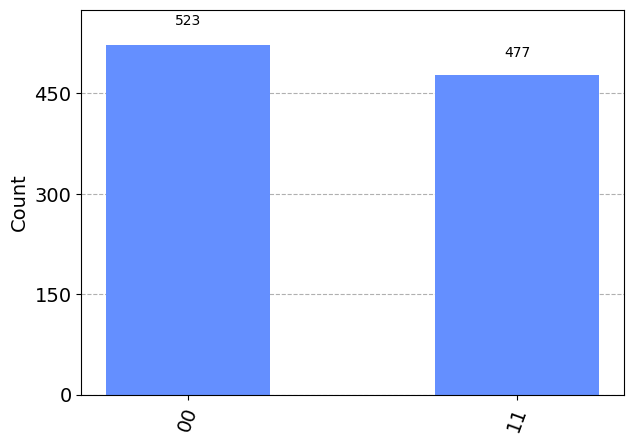

In [52]:
# Plot a histogram of data
# Return and understand the histogram data of an experiment
counts = result.get_counts()
plot_histogram(counts)


In [11]:
# Access a statevector_simulator backend
from qiskit.quantum_info import state_fidelity

backend = Aer.get_backend('statevector_simulator')

qc1 = QuantumCircuit(2,1)
qc1.x(0)

qc2 = QuantumCircuit(2,1)
qc2.rx(3.17, 0)

# Return and understand the statevector of an experiment
sv1 = execute(qc1, backend).result().get_statevector(qc1)
sv2 = execute(qc2, backend).result().get_statevector(qc2)
print(sv1)
print(sv2)

# Measure fidelity
print(state_fidelity(sv1, sv2))

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([-0.0142032+0.j        ,  0.       -0.99989913j,
              0.       +0.j        ,  0.       +0.j        ],
            dims=(2, 2))
0.999798269234043


In [17]:
# Access a unitary_simulator backend
backend = Aer.get_backend('unitary_simulator')
qc6 = QuantumCircuit(2)
qc6.h(1)
qc6.x(0)
qc6.cx(1,0)

# Return and understand the unitary of an experiment
unit = execute(qc6, backend).result().get_unitary(qc6)
array_to_latex(unit)

<IPython.core.display.Latex object>

x   Construct multi-qubit quantum registers
x   Measure quantum circuits in classical registers
x   Use single-qubit gates
x   Use multi-qubit gates
x   Use barrier operations
x   Return the circuit depth
    Extend quantum circuits
x   Return the OpenQASM string for a circuit

x   Execute a quantum circuit

x   Use the available simulators

x   Read a QASM file and string

x   Use classical and quantum registers
    Use operators
x   Measure fidelity

x   Return and understand the histogram data of an experiment
x   Return and understand the statevector of an experiment
x   Return and understand the unitary of an experiment

x   Monitor the status of a job instance

x   Perform operations around the Qiskit version
    Use information gained from %quiskit_backend_overview

x   Draw a circuit
x   Plot a histogram of data
    Plot a Bloch multivector
    Plot a Bloch vector
    Plot a QSphere
    Plot a density matrix
    Plot a gate map with error rates

x   Access a statevector_simulator backend
x   Access a qasm_simulator backend
x   Access a unitary_simulator backend